In [2]:
import pandas as pd
weather_features = pd.read_csv('https://raw.githubusercontent.com/Borgarelli/IAHourly_energy_demand_generation_weather/main/weather_features.csv')

weather_features = pd.get_dummies(weather_features, columns=['city_name', 'weather_description'])
weather_features.head(500)

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,2015-01-01 00:00:00+01:00,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2015-01-01 01:00:00+01:00,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,2015-01-01 02:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2015-01-01 03:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,2015-01-01 04:00:00+01:00,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2015-01-21 14:00:00+01:00,283.792,283.792,283.792,1007,51,8,240,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
496,2015-01-21 15:00:00+01:00,283.750,283.750,283.750,1007,55,12,220,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
497,2015-01-21 16:00:00+01:00,283.350,283.350,283.350,1006,49,14,311,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
498,2015-01-21 17:00:00+01:00,280.950,280.950,280.950,1007,66,6,293,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
weather_features.drop(['dt_iso', 'rain_1h', 'rain_3h','snow_3h', 'weather_icon'], axis=1, inplace=True)
weather_features.head(500)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,...,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,270.475,270.475,270.475,1001,77,1,62,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
1,270.475,270.475,270.475,1001,77,1,62,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
2,269.686,269.686,269.686,1002,78,0,23,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
3,269.686,269.686,269.686,1002,78,0,23,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
4,269.686,269.686,269.686,1002,78,0,23,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,283.792,283.792,283.792,1007,51,8,240,26,802,clouds,...,0,0,0,0,0,0,0,0,0,0
496,283.750,283.750,283.750,1007,55,12,220,20,801,clouds,...,0,0,0,0,0,0,0,0,0,0
497,283.350,283.350,283.350,1006,49,14,311,20,801,clouds,...,0,0,0,0,0,0,0,0,0,0
498,280.950,280.950,280.950,1007,66,6,293,88,804,clouds,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Encontre as condições meteorológicas com menos de um certo número de instâncias (por exemplo, 5)
rare_conditions = weather_features['weather_main'].value_counts()[weather_features['weather_main'].value_counts() < 500].index

# Substitua essas condições meteorológicas raras por uma nova categoria
weather_features['weather_main'] = weather_features['weather_main'].apply(lambda x: 'outros' if x in rare_conditions else x)


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,...,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,270.475,270.475,270.475,1001,77,1,62,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
1,270.475,270.475,270.475,1001,77,1,62,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
2,269.686,269.686,269.686,1002,78,0,23,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
3,269.686,269.686,269.686,1002,78,0,23,0,800,clear,...,1,0,0,0,0,0,0,0,0,0
4,269.686,269.686,269.686,1002,78,0,23,0,800,clear,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Todos os atributos menos as colunas de classe codificadas
X = weather_features.drop(['weather_main'], axis=1)

# Colunas de classe codificadas
y = weather_features['weather_main']

In [24]:
# Retira 20% para testar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [25]:
# Treina com 80%
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(random_state=1, max_iter=1000)

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

# Aplicar oversampling às suas features X e classes y
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instancie um classificador tipo rede neural
model = MLPClassifier(
    random_state=1,
    max_iter=1000,  # Aumente o número de iterações para 1000
    hidden_layer_sizes=(100, 100),  # Adicione uma camada oculta adicional
    learning_rate='adaptive',  # Use 'adaptive' para ajustar automaticamente a taxa de aprendizado
    learning_rate_init=0.02,  # Taxa de aprendizado inicial
    n_iter_no_change=10,  # Número de iterações sem melhoria para parar o treinamento
    tol=1e-4,  # Tolerância para convergência
)




# Treine o modelo
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate='adaptive',
              learning_rate_init=0.02, max_iter=1000, random_state=1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Aplicar oversampling às suas features X e classes y
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Divida os dados em conjuntos de treinamento e teste após o oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Pré-processamento de dados: Trate valores ausentes e normalize recursos
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instancie um classificador tipo rede neural com ajustes de hiperparâmetros
model = MLPClassifier(
    random_state=1,
    max_iter=1000,
    hidden_layer_sizes=(100, 100),
    learning_rate='adaptive',
    learning_rate_init=0.01,  # Ajustado para um valor menor
    alpha=0.0001,  # Regularização L2
    tol=1e-5,  # Tolerância menor para convergência
    n_iter_no_change=20,  # Maior número de iterações sem melhoria para parar o treinamento
)

# Treine o modelo
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000, n_iter_no_change=20,
              random_state=1, tol=1e-05)

Acurácia: 1.00
Precisão: 1.00
Matriz de Confusão


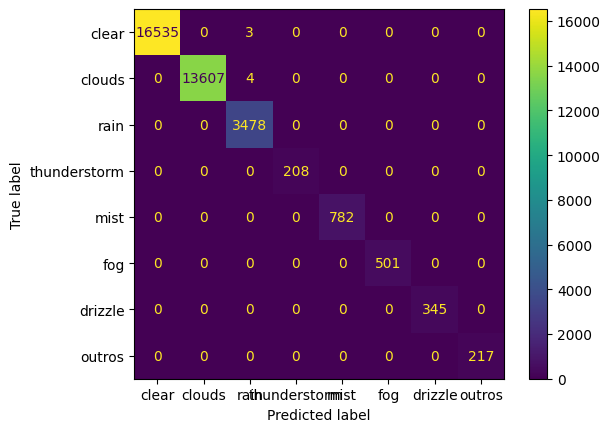

In [26]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))
# Precisão
precision = precision_score(y_test, y_pred, average = 'macro',zero_division = 0.0)
print("Precisão: {:.2f}".format(precision))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()